## Importar librerías

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

## 1. Carga de los datos

In [4]:
df = pd.read_csv('./data/final_preprocessed.csv', encoding='UTF-8', sep=',')

In [5]:
# Dimensiones del dataframe
df.shape

(5338, 68)

In [6]:
# Drop first column
df = df.drop(df.columns[0], axis=1)
df.sample(5) # Muestra aleatoria


,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,Road_Type_1SoloSentido,Road_Type_Autovia,Road_Type_Calzada,Road_Type_Circunvalacion,Road_Type_Desconocida,Road_Type_Rotonda,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Light_Conditions_Diurna,Light_Conditions_Oscuridad_Iluminacion_Desconocida,Light_Conditions_Oscuridad_Luces_Apagadas,Light_Conditions_Oscuridad_Luces_Encendidas,Light_Conditions_Oscuridad_Sin_Iluminacion,"Weather_Conditions_Bien, con vientos fuertes","Weather_Conditions_Bien, con vientos suaves",Weather_Conditions_Desconocido,Weather_Conditions_Lluvioso,"Weather_Conditions_Lluvioso, con vientos fuertes",Weather_Conditions_Nevando,"Weather_Conditions_Nevando, con vientos fuertes",Weather_Conditions_Niebla,Weather_Conditions_Otro,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urbano,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_No se reporto,Did_Police_Officer_Attend_Scene_of_Accident_Si,Junction_Detail_+4salidas,Junction_Detail_Carretera_Acceso,Junction_Detail_Encrucijada,Junction_Detail_Entrada_Privada,Junction_Detail_Minirotonda,Junction_Detail_No_hay_cruce,Junction_Detail_Otros,Junction_Detail_Rotonda,Junction_Detail_T,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
3138,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4990,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2525,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3279,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4722,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## 2. Algoritmo de k-means

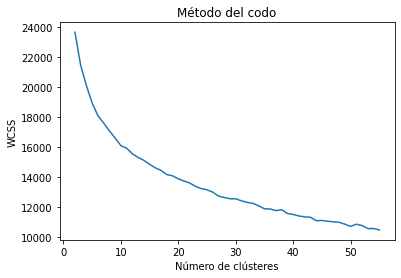

In [7]:
from sklearn.cluster import KMeans

# Convertir el dataframe a un array
X = df.values

# Columnas del dataframe
columns = df.columns

# Elegir el número de clústeres utilizando el método del codo
import matplotlib.pyplot as plt
wcss = []
for i in range(2, 56):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 56), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()


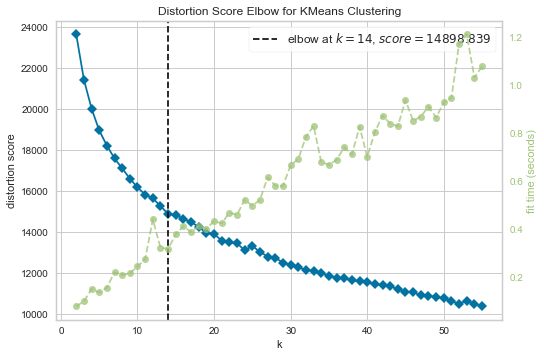

In [8]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,56),ax=ax)
visualizer.fit(X)

visualizer.show()
plt.show()

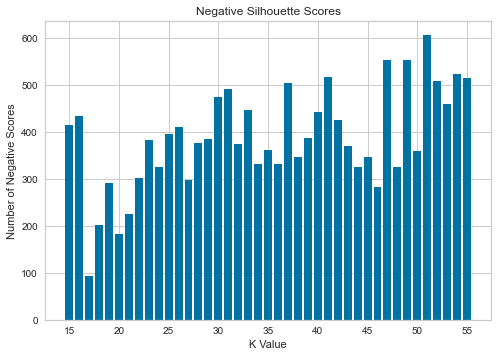

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(15,56)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    model.fit(df)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df, model.predict(df))


    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
# Plot the results
plt.bar(bad_k_values.keys(), bad_k_values.values())
plt.title('Negative Silhouette Scores')
plt.xlabel('K Value')
plt.ylabel('Number of Negative Scores')
plt.show()
          

In [29]:

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=20, init='k-means++',random_state=32)
kmeans_fit = kmeans.fit(X)
cols_number = df.to_numpy()
labels = kmeans.labels_
df['cluster'] = labels

In [32]:
# Centroides de los clústeres
centroids = kmeans_fit.cluster_centers_
centroids = pd.DataFrame(centroids, columns=columns)
centroids

,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,Road_Type_1SoloSentido,Road_Type_Autovia,Road_Type_Calzada,Road_Type_Circunvalacion,Road_Type_Desconocida,Road_Type_Rotonda,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Light_Conditions_Diurna,Light_Conditions_Oscuridad_Iluminacion_Desconocida,Light_Conditions_Oscuridad_Luces_Apagadas,Light_Conditions_Oscuridad_Luces_Encendidas,Light_Conditions_Oscuridad_Sin_Iluminacion,"Weather_Conditions_Bien, con vientos fuertes","Weather_Conditions_Bien, con vientos suaves",Weather_Conditions_Desconocido,Weather_Conditions_Lluvioso,"Weather_Conditions_Lluvioso, con vientos fuertes",Weather_Conditions_Nevando,"Weather_Conditions_Nevando, con vientos fuertes",Weather_Conditions_Niebla,Weather_Conditions_Otro,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urbano,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_No se reporto,Did_Police_Officer_Attend_Scene_of_Accident_Si,Junction_Detail_+4salidas,Junction_Detail_Carretera_Acceso,Junction_Detail_Encrucijada,Junction_Detail_Entrada_Privada,Junction_Detail_Minirotonda,Junction_Detail_No_hay_cruce,Junction_Detail_Otros,Junction_Detail_Rotonda,Junction_Detail_T,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,4.336809e-19,2.906404e-01,1.182266e-01,0.591133,0.926108,0.068966,4.926108e-03,-1.084202e-19,3.330669e-16,1.000000e+00,8.374384e-02,0.054187,8.078818e-01,4.926108e-03,4.433498e-02,4.926108e-03,-5.421011e-20,0.034483,0.931034,0.029557,3.469447e-18,4.926108e-03,-1.734723e-18,9.605911e-01,0.004926,4.926108e-03,2.463054e-02,4.926108e-03,9.852217e-03,0.876847,0.103448,4.926108e-03,-1.734723e-18,8.673617e-19,-5.421011e-20,-4.336809e-19,4.926108e-03,4.926108e-03,9.802956e-01,-8.326673e-17,-4.336809e-19,1.477833e-02,-5.421011e-20,1.477833e-01,8.522167e-01,9.950739e-01,4.926108e-03,-1.110223e-16,1.477833e-02,4.926108e-03,1.083744e-01,1.477833e-02,8.673617e-19,5.024631e-01,3.940887e-02,1.477833e-02,3.004926e-01,1.000000,4.336809e-19,4.926108e-03,7.044335e-01,2.906404e-01,1.477833e-02,-8.326673e-17,-5.421011e-20,-4.336809e-19,9.852217e-01
1,8.673617e-19,3.280899e-01,1.303371e-01,0.541573,0.829213,0.168539,2.247191e-03,1.084202e-19,1.000000e+00,-2.220446e-16,5.393258e-02,0.069663,8.584270e-01,2.247191e-03,1.573034e-02,2.081668e-17,2.247191e-03,0.053933,0.883146,0.049438,6.741573e-03,4.494382e-03,-8.673617e-19,9.617978e-01,0.002247,2.247191e-03,3.370787e-02,1.734723e-17,1.123596e-02,0.975281,0.008989,-4.163336e-17,3.469447e-18,2.247191e-03,5.421011e-20,-8.673617e-19,2.247191e-03,2.247191e-03,9.910112e-01,-2.775558e-17,6.741573e-03,-3.469447e-18,5.421011e-20,-1.387779e-16,1.000000e+00,2.775558e-17,8.988764e-03,9.910112e-01,0.000000e+00,1.734723e-18,1.387779e-17,6.938894e-18,0.000000e+00,1.000000e+00,-2.775558e-17,1.387779e-17,1.665335e-16,1.000000,8.673617e-19,1.123596e-02,9.887640e-01,1.110223e-16,-3.469447e-18,-2.775558e-17,5.421011e-20,6.741573e-03,9.932584e-01
2,5.263158e-03,-1.110223e-16,9.263158e-01,0.068421,0.878947,0.121053,-4.336809e-19,-1.084202e-19,2.220446e-16,1.000000e+00,4.736842e-02,0.047368,8.736842e-01,5.263158e-03,5.263158e-03,2.105263e-02,-5.421011e-20,0.047368,0.910526,0.026316,1.052632e-02,5.263158e-03,-1.734723e-18,-1.110223e-16,0.031579,1.052632e-02,9.368421e-01,2.105263e-02,1.578947e-02,0.957895,0.026316,1.387779e-17,0.000000e+00,8.673617e-19,-5.421011e-20,-6.505213e-19,1.734723e-18,-1.734723e-18,9.894737e-01,-5.55111

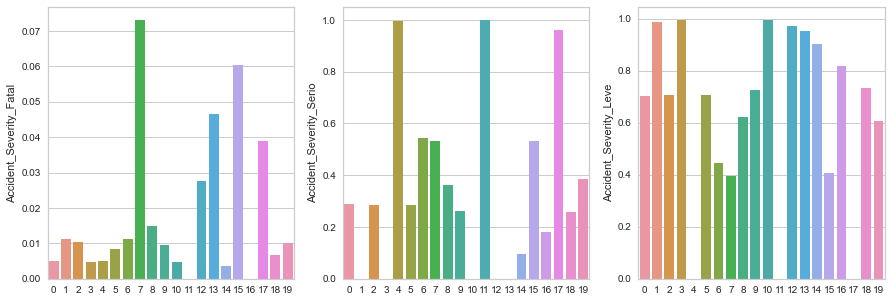

In [33]:
# Plot centroids of Accident_Severity_Fatal, Accident_Severity_Serio and Accident_Severity_Leve for each cluster
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=centroids.index, y=centroids['Accident_Severity_Fatal'], ax=ax[0])
sns.barplot(x=centroids.index, y=centroids['Accident_Severity_Serio'], ax=ax[1])
sns.barplot(x=centroids.index, y=centroids['Accident_Severity_Leve'], ax=ax[2])
plt.show()

C:\Users\fesar\AppData\Local\Temp\ipykernel_17492\1726969067.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


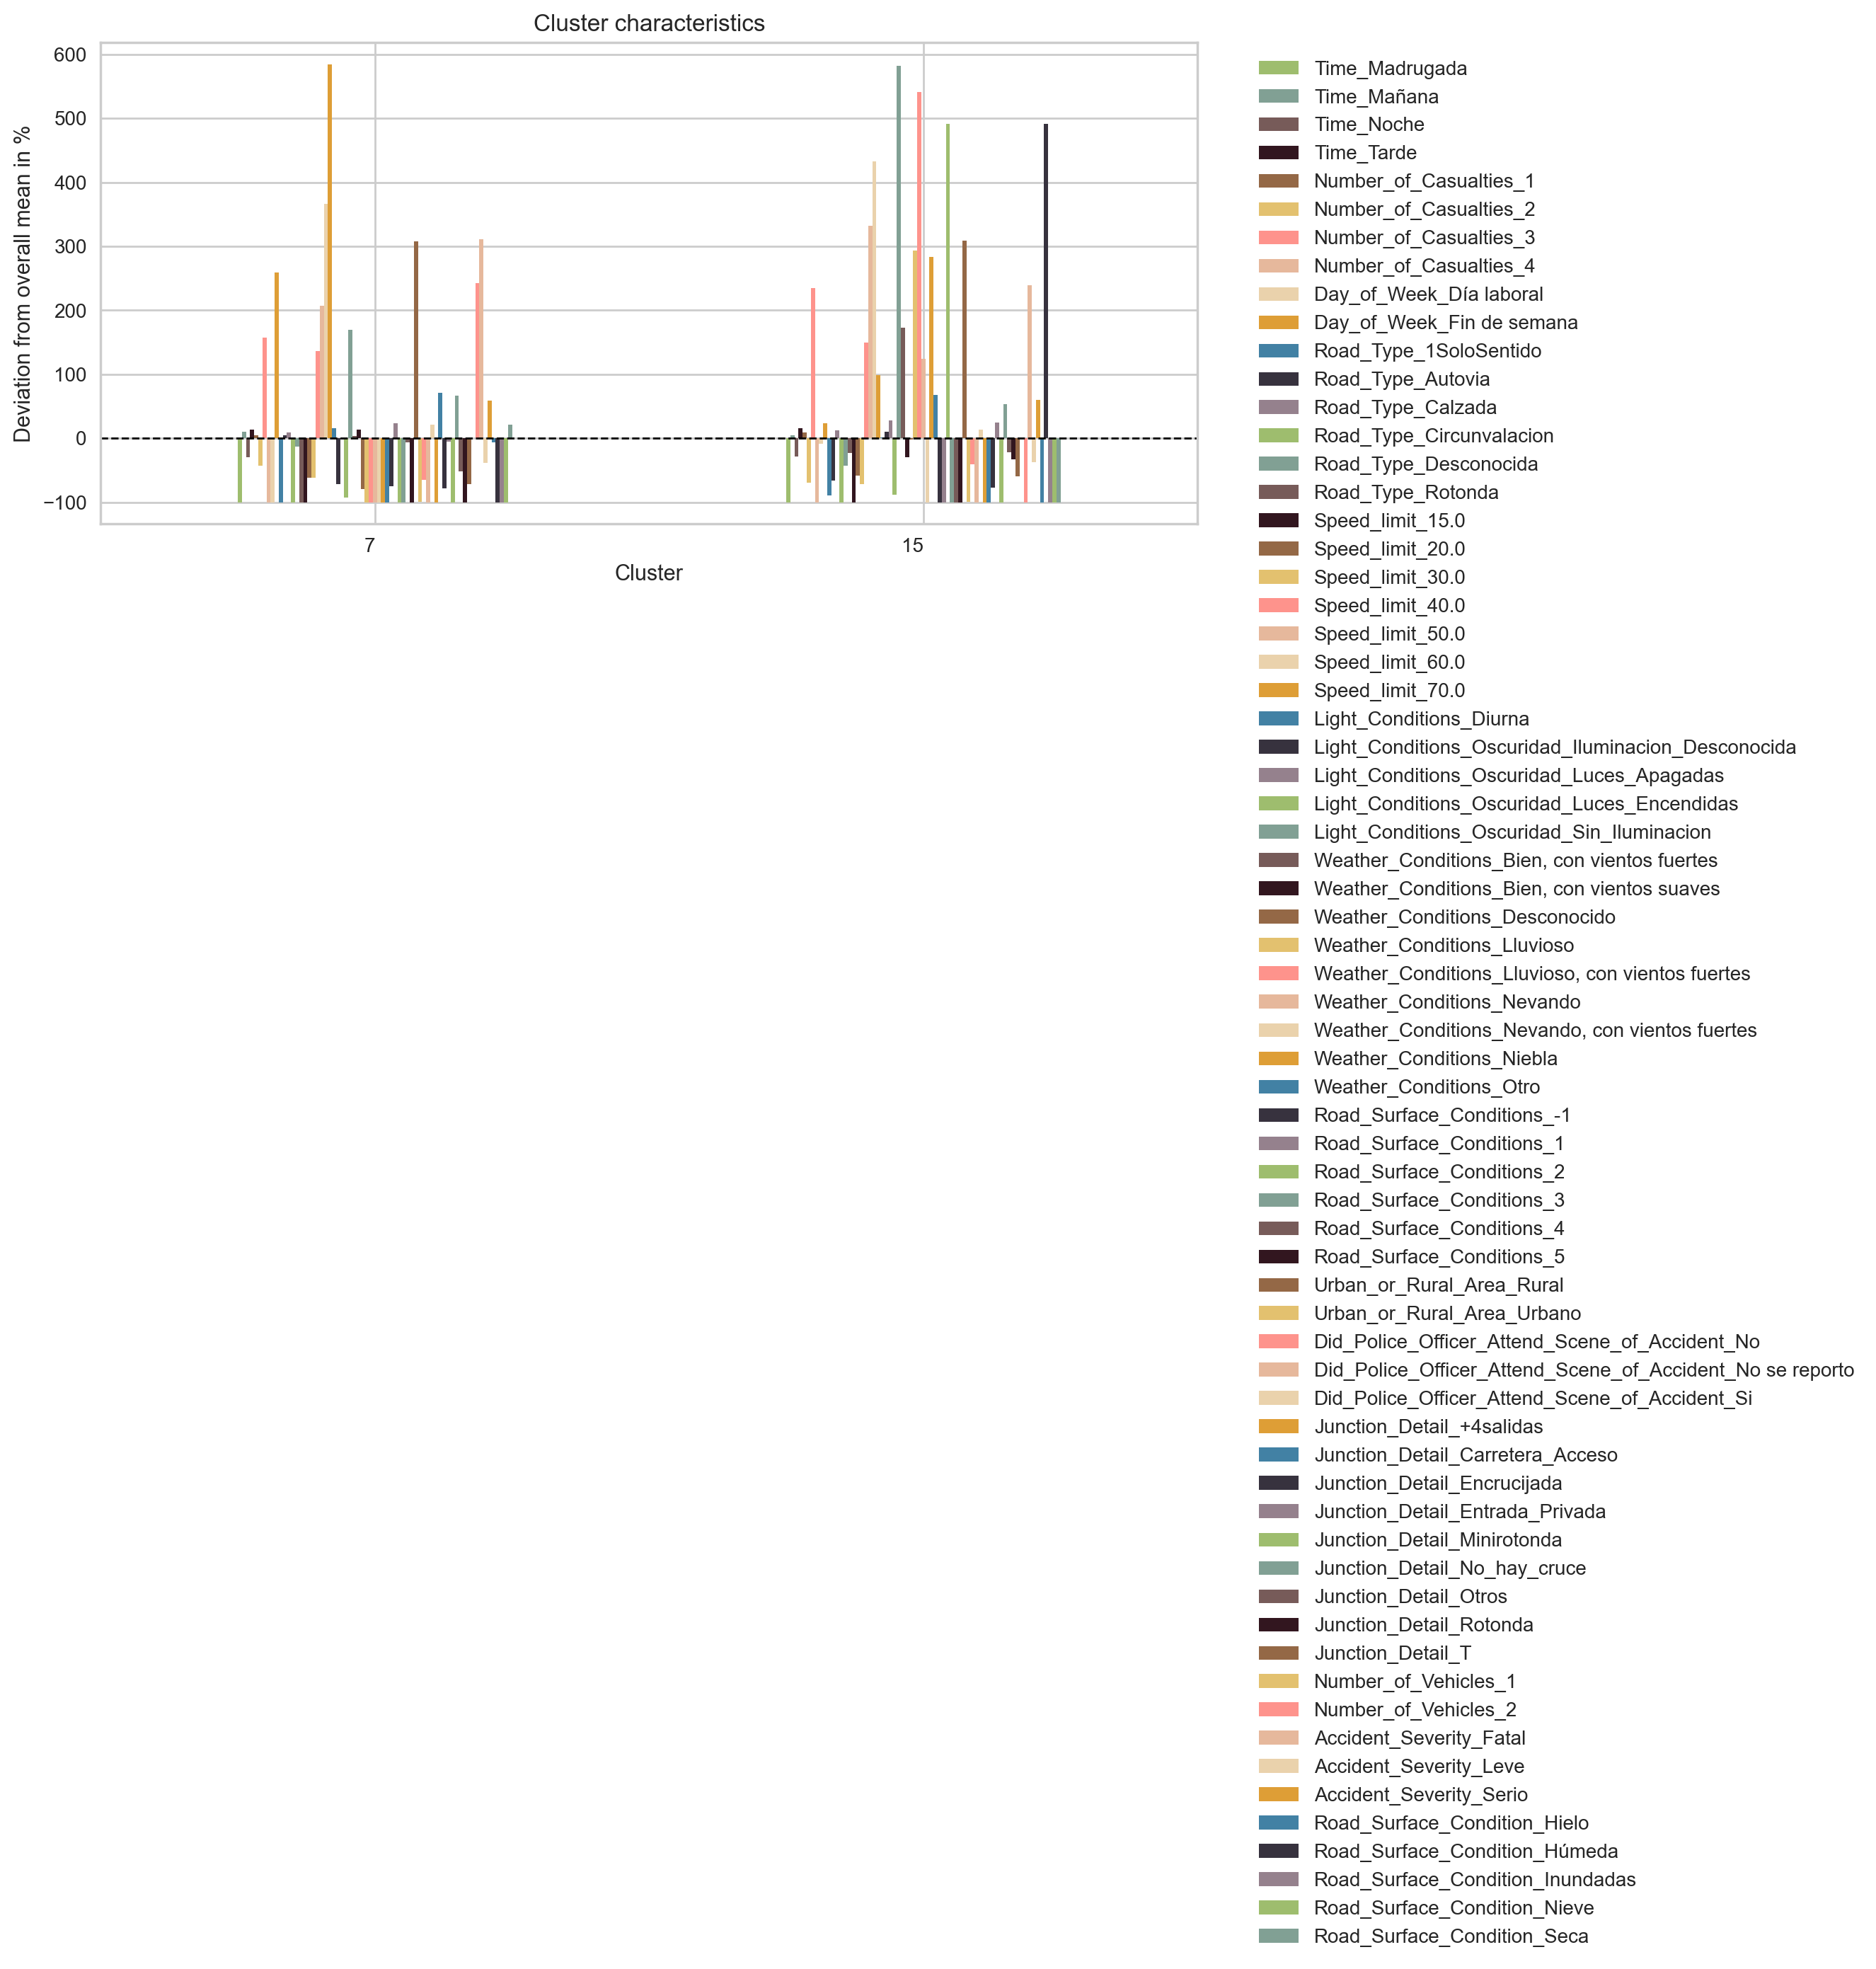

In [45]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

X = df.copy()

X_mean = pd.concat([pd.DataFrame(X.mean().drop('cluster'), columns=['mean']), 
                   X.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.loc[[7,15]].plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

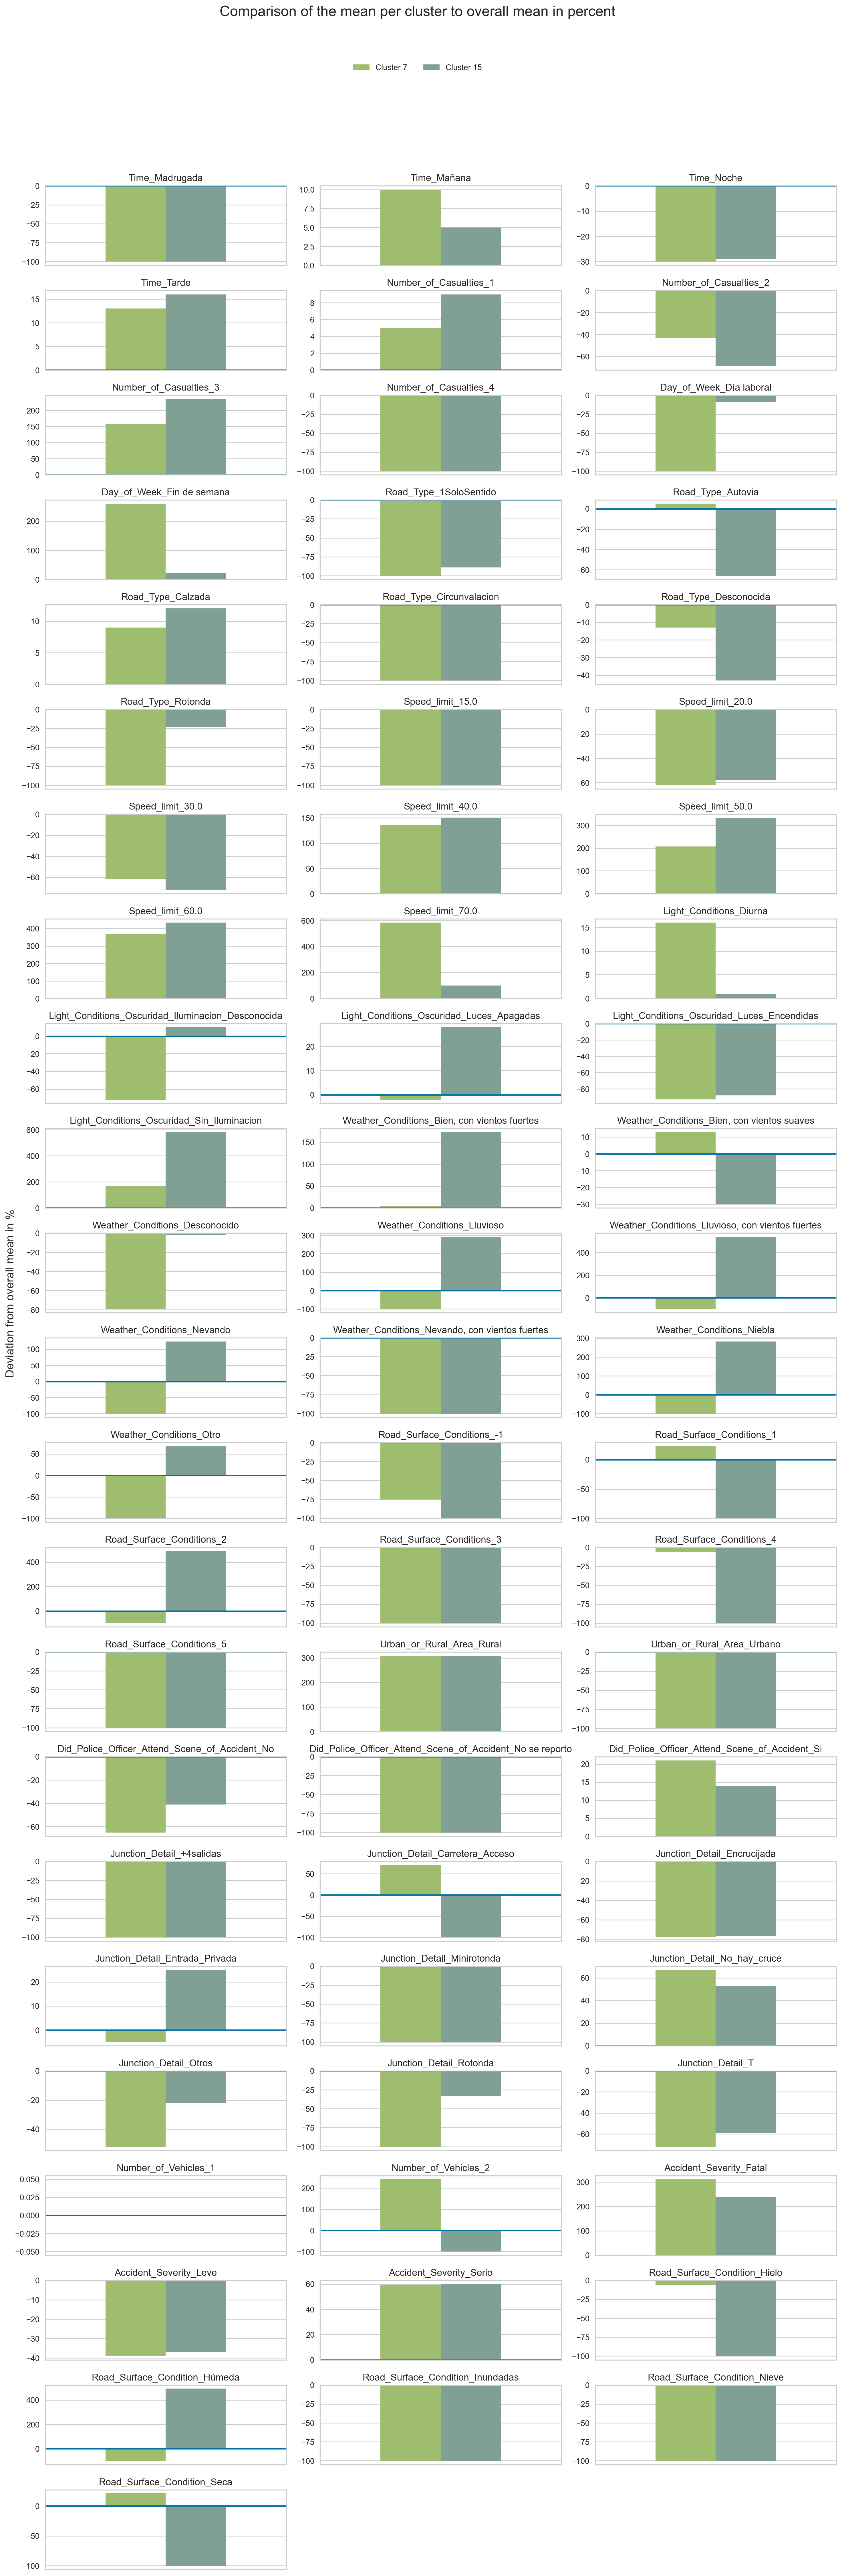

In [67]:
import matplotlib.patches as mpatches
def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):
    
    features = X_comparison.index
    ncols = 3
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(15,45), dpi=200)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison.loc[[feature], [7, 15]].plot(kind='bar', ax=ax, title=feature,
                                                color=[colors[0], colors[1]], legend=False)
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    fig.legend(handles=[mpatches.Patch(color=colors[0], label='Cluster 7'),
                        mpatches.Patch(color=colors[1], label='Cluster 15')],
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]    
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")

In [51]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(df.columns)
radar = Radar(fig, df.columns, np.unique(kmeans.labels_))

for k in range(7,8):
    cluster_data = kmeans_fit[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

TypeError: 'KMeans' object is not subscriptable

Error in callback <function flush_figures at 0x0000016BA4CAADD0> (for post_execute):


KeyboardInterrupt: 

In [16]:
from kmeans_feature_imp import KMeansInterp

n_clusters = len(df['cluster'].unique())
kmeans_interp = KMeansInterp(n_clusters=n_clusters, random_state=1, feature_importance_method='wcss_min', ordered_feature_names=columns).fit(X)
kmeans_interp.feature_importances_

{0: [('Number_of_Vehicles_1', 1.0),
  ('Accident_Severity_Serio', 0.9999999999999999),
  ('Number_of_Casualties_1', 0.9999999999999999),
  ('Did_Police_Officer_Attend_Scene_of_Accident_Si', 0.9926650366748166),
  ('Road_Surface_Condition_Seca', 0.980440097799511),
  ('Urban_or_Rural_Area_Urbano', 0.980440097799511),
  ('Road_Surface_Conditions_1', 0.97799511002445),
  ('Weather_Conditions_Bien, con vientos suaves', 0.9755501222493886),
  ('Light_Conditions_Diurna', 0.9511002444987774),
  ('Day_of_Week_Día laboral', 0.8704156479217604),
  ('Speed_limit_30.0', 0.8508557457212713),
  ('Road_Type_Calzada', 0.8337408312958435),
  ('Time_Tarde', 0.4694376528117359),
  ('Junction_Detail_T', 0.3911980440097799),
  ('Junction_Detail_No_hay_cruce', 0.38386308068459657),
  ('Time_Mañana', 0.3643031784841076),
  ('Time_Noche', 0.16381418092909533),
  ('Day_of_Week_Fin de semana', 0.12958435207823968),
  ('Junction_Detail_Encrucijada', 0.10513447432762839),
  ('Speed_limit_20.0', 0.0904645476772616